In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import files

# This will prompt you to select a file from your local system
uploaded = files.upload()

crime_data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

crime_data

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012 (1).csv


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [ ]:
unique_states = crime_data['STATE/UT'].unique()

In [ ]:
print("Unique States/UTs:")
print(unique_states)


Unique States/UTs:
['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']


In [ ]:
print("Missing values before cleaning:")
print(crime_data.isnull().sum())
crime_data.dropna(inplace=True)  # Drop rows with missing values
print("Missing values after cleaning:")
print(crime_data.isnull().sum())
crime_data.columns

Missing values before cleaning:
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
crime_data.rename(columns={
    "STATE/UT": "State",
    "YEAR": "Year",
    "TOTAL IPC CRIMES": "Crime_Count"  # Replace with actual column name if different
}, inplace=True)


In [ ]:
crime_data['State'] = crime_data['State'].str.strip()

In [ ]:
crime_data.drop_duplicates(inplace=True)

In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [ ]:
crime_data = crime_data[['State', 'Year', 'Crime_Count']]


crime_data


,State,Year,Crime_Count
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507
...,...,...,...
9012,LAKSHADWEEP,2012,60
9013,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,2012,787
9015,PUDUCHERRY,2012,3494


In [ ]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,9017.0,2006.629034,3.463623,2001.0,2004.0,2007.0,2010.0,2012.0
MURDER,9017.0,89.285350,327.275030,0.0,18.0,38.0,66.0,7601.0
ATTEMPT TO MURDER,9017.0,78.069646,303.446020,0.0,10.0,28.0,56.0,7964.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,9017.0,9.895531,59.521657,0.0,0.0,2.0,6.0,1616.0
RAPE,9017.0,53.041366,190.741450,0.0,8.0,20.0,41.0,3425.0
CUSTODIAL RAPE,9017.0,0.005767,0.115223,0.0,0.0,0.0,0.0,5.0
OTHER RAPE,9017.0,53.035599,190.725474,0.0,8.0,20.0,41.0,3425.0
KIDNAPPING & ABDUCTION,9017.0,79.152046,317.630964,0.0,10.0,25.0,56.0,8878.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,9017.0,58.535433,246.937464,0.0,6.0,18.0,42.0,7910.0
KIDNAPPING AND ABDUCTION OF OTHERS,9017.0,20.616613,88.586415,0.0,1.0,5.0,13.0,2416.0


In [ ]:
crime_data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [ ]:
print("Missing values before cleaning:")
print(crime_data.isnull().sum())
crime_data.dropna(inplace=True)

Missing values before cleaning:
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0

In [ ]:
crime_data.rename(columns={
    "STATE/UT": "State",
    "YEAR": "Year",
    "TOTAL IPC CRIMES": "Crime_Count"
}, inplace=True)

In [ ]:
crime_data

,State,Year,Crime_Count
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507
...,...,...,...
9012,LAKSHADWEEP,2012,60
9013,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,2012,787
9015,PUDUCHERRY,2012,3494


In [ ]:
crime_data['State']=crime_data['State'].str.strip()
crime_data

,State,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Crime_Count
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [ ]:
state_year_crime = crime_data.groupby(['State', 'Year'])['Crime_Count'].sum().reset_index()

state_year_crime

,State,Year,Crime_Count
0,A & N ISLANDS,2001,1316
1,A & N ISLANDS,2002,1216
2,A & N ISLANDS,2003,1288
3,A & N ISLANDS,2004,1496
4,A & N ISLANDS,2005,1364
...,...,...,...
415,WEST BENGAL,2008,210838
416,WEST BENGAL,2009,226072
417,WEST BENGAL,2010,259232
418,WEST BENGAL,2011,286394


In [ ]:
crime_data = crime_data[['State', 'Year', 'Crime_Count']]
crime_data

,State,Year,Crime_Count
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507
...,...,...,...
9012,LAKSHADWEEP,2012,60
9013,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,2012,787
9015,PUDUCHERRY,2012,3494


In [ ]:
state_crime_rate = crime_data.groupby('State')['Crime_Count'].sum().reset_index()

In [ ]:
state_year_crime = crime_data.groupby(['State', 'Year'])['Crime_Count'].sum().reset_index()
state_year_crime

,State,Year,Crime_Count
0,A & N ISLANDS,2001,1316
1,A & N ISLANDS,2002,1216
2,A & N ISLANDS,2003,1288
3,A & N ISLANDS,2004,1496
4,A & N ISLANDS,2005,1364
...,...,...,...
415,WEST BENGAL,2008,210838
416,WEST BENGAL,2009,226072
417,WEST BENGAL,2010,259232
418,WEST BENGAL,2011,286394


In [ ]:
state_year_crime = crime_data.groupby(['State', 'Year'])['Crime_Count'].sum().reset_index()
state_year_crime

,State,Year,Crime_Count
0,A & N ISLANDS,2001,1316
1,A & N ISLANDS,2002,1216
2,A & N ISLANDS,2003,1288
3,A & N ISLANDS,2004,1496
4,A & N ISLANDS,2005,1364
...,...,...,...
415,WEST BENGAL,2008,210838
416,WEST BENGAL,2009,226072
417,WEST BENGAL,2010,259232
418,WEST BENGAL,2011,286394


In [ ]:
state_crime_rate = crime_data.groupby('State')['Crime_Count'].sum().reset_index()

state_crime_rate


,State,Crime_Count
0,A & N ISLANDS,18204
1,ANDHRA PRADESH,4037962
2,ARUNACHAL PRADESH,55304
3,ASSAM,1195528
4,BIHAR,2692586
5,CHANDIGARH,81614
6,CHHATTISGARH,1122054
7,D & N HAVELI,9302
8,DAMAN & DIU,5896
9,DELHI UT,1266348


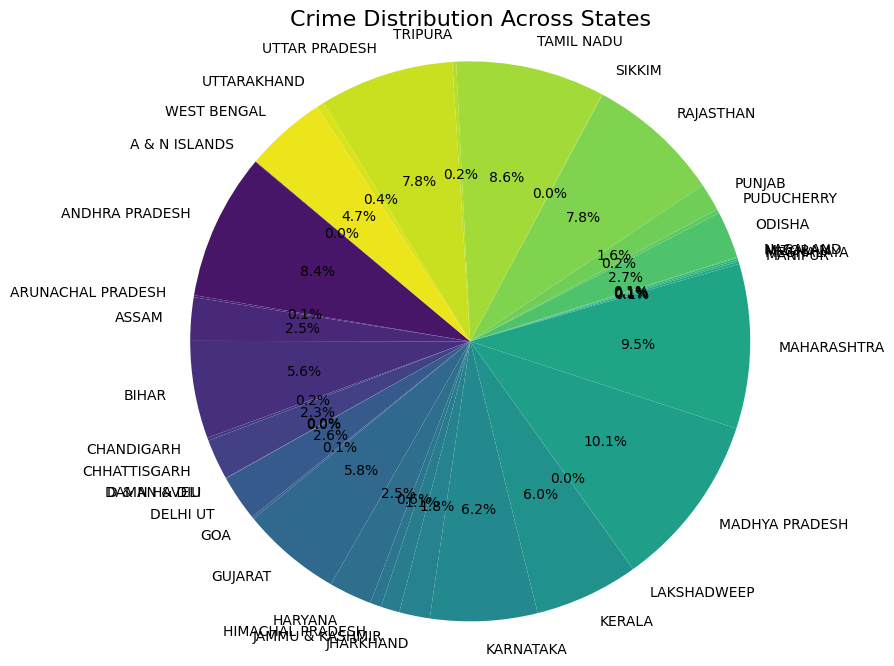

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(state_crime_rate['Crime_Count'], labels=state_crime_rate['State'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(state_crime_rate)))
plt.title('Crime Distribution Across States', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


<ipython-input-60-33387933a472>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


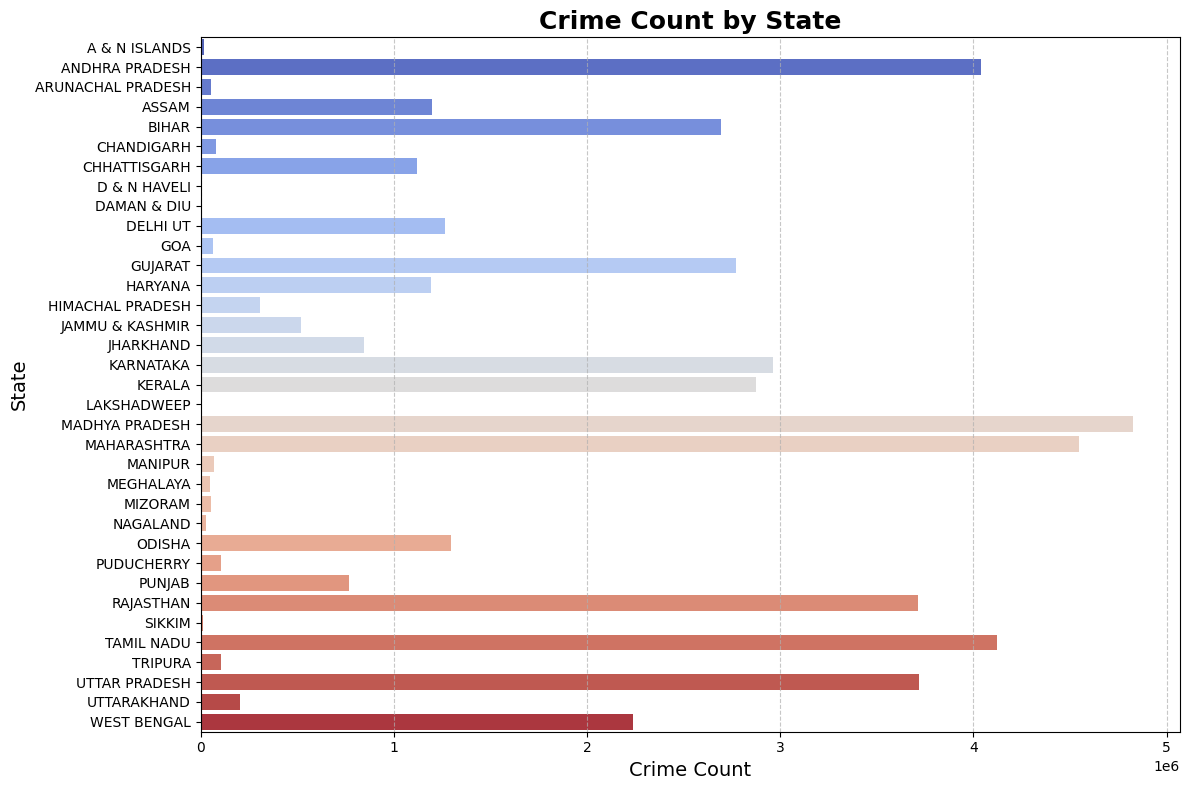

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(state_crime_rate))
sns.barplot(
    x='Crime_Count',
    y='State',
    data=state_crime_rate,
    palette=colors
)
plt.title('Crime Count by State', fontsize=18, weight='bold')
plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-65-7bba257cb9bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


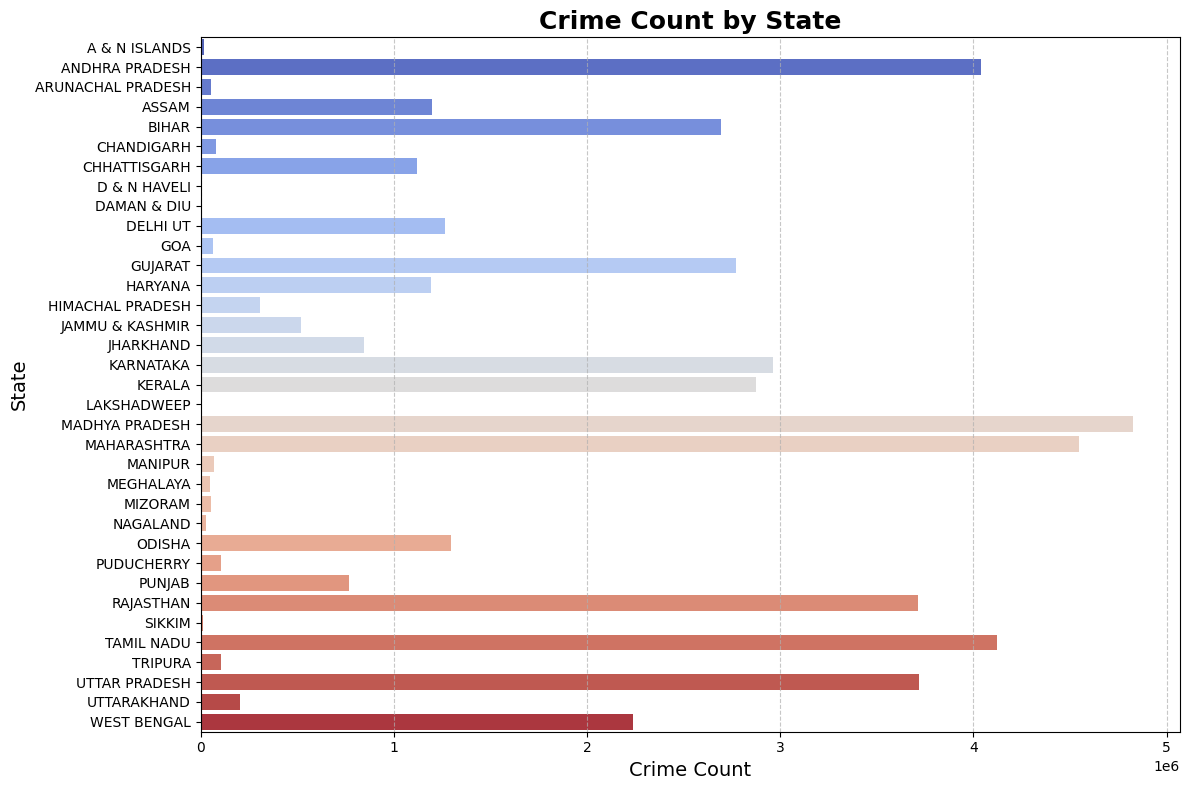

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(state_crime_rate))
sns.barplot(
    x='Crime_Count',
    y='State',
    data=state_crime_rate,
    palette=colors
)
plt.title('Crime Count by State', fontsize=18, weight='bold')
plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
pd.get_dummies(crime_data, columns=['State'], drop_first=True)

,Year,Crime_Count,State_ANDHRA PRADESH,State_ARUNACHAL PRADESH,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHHATTISGARH,State_D & N HAVELI,State_DAMAN & DIU,...,State_ODISHA,State_PUDUCHERRY,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMIL NADU,State_TRIPURA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2001,4154,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2001,4125,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2001,5818,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2001,3140,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2001,6507,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,2012,60,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9013,2012,60,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9014,2012,787,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9015,2012,3494,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)